# Prepare the data frame

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# We upload the 3 data frames that we have: one with graph's properties, one with historical stats of each team, and one with the historical encounters between each pair of teams
df_graph_properties=pd.read_csv('/content/drive/Shareddrives/Ceci y Vale/RCEL 506/Código/Archivos csv/df_historical_graph_properties.csv')
df_history = pd.read_csv('/content/drive/Shareddrives/Ceci y Vale/RCEL 506/Código/Archivos csv/history_teams_matchid')
df_pair = pd.read_csv('/content/drive/Shareddrives/Ceci y Vale/RCEL 506/Código/Archivos csv/pair_history_df')

In [76]:
df_graph_properties.head()

,match_id,home_team,away_team,outcome,home_density,home_diameter,home_transitivity,home_average_clustering,away_density,away_diameter,...,away_density_3,away_transitivity_1,away_transitivity_2,away_transitivity_3,away_average_clustering_1,away_average_clustering_2,away_average_clustering_3,away_diameter_1,away_diameter_2,away_diameter_3
0,3888713,Real Madrid,Barcelona,away_team_winner,3.500000,2.0,6.361446,0.241817,2.848485,2.0,...,2.885855,5.507165,5.507165,5.507165,0.180394,0.180394,0.180394,2.08044,2.08044,2.08044
1,68353,Espanyol,Barcelona,away_team_winner,1.417582,2.0,3.366667,0.288377,2.923077,2.0,...,2.885855,5.108108,5.507165,5.507165,0.235510,0.180394,0.180394,2.00000,2.08044,2.08044
2,68313,Barcelona,Osasuna,home_team_winner,2.472527,2.0,4.238532,0.157029,1.593407,2.0,...,2.885855,5.507165,5.507165,5.507165,0.180394,0.180394,0.180394,2.08044,2.08044,2.08044
3,68314,Barcelona,Málaga,home_team_winner,4.102564,2.0,6.906250,0.126724,1.461538,2.0,...,2.885855,5.507165,5.507165,5.507165,0.180394,0.180394,0.180394,2.08044,2.08044,2.08044
4,69153,Albacete,Barcelona,away_team_winner,1.901099,3.0,4.270588,0.121966,2.164835,3.0,...,2.885855,5.703297,5.108108,5.507165,0.188117,0.235510,0.180394,2.00000,2.00000,2.08044


In [77]:
df_history.head()

,match_id,winning_history_home,winning_history_away,losing_history_home,losing_history_away,tie_history_home,tie_history_away,avg_goals_home,avg_goals_away
0,3888713,0.33,0.33,0.33,0.33,0.33,0.33,1.516484,1.502609
1,68353,0.33,1.00,0.33,0.00,0.33,0.00,1.516484,5.000000
2,68313,1.00,0.33,0.00,0.33,0.00,0.33,3.000000,1.502609
3,68314,1.00,0.33,0.00,0.33,0.00,0.33,3.000000,1.502609
4,69153,0.33,1.00,0.33,0.00,0.33,0.00,1.516484,3.250000


In [78]:
df_pair.head()

,match_id,home_team,away_team,pair_win_home,pair_win_away,pair_tie
0,3888713,Real Madrid,Barcelona,0.33,0.33,0.33
1,68353,Espanyol,Barcelona,0.33,0.33,0.33
2,68313,Barcelona,Osasuna,0.33,0.33,0.33
3,68314,Barcelona,Málaga,0.33,0.33,0.33
4,69153,Albacete,Barcelona,0.33,0.33,0.33


In [79]:
# We first merge the 2 first datasets
merge_1 = pd.merge(df_graph_properties, df_history, on='match_id', how='left')

In [80]:
merge_1.head()

,match_id,home_team,away_team,outcome,home_density,home_diameter,home_transitivity,home_average_clustering,away_density,away_diameter,...,away_diameter_2,away_diameter_3,winning_history_home,winning_history_away,losing_history_home,losing_history_away,tie_history_home,tie_history_away,avg_goals_home,avg_goals_away
0,3888713,Real Madrid,Barcelona,away_team_winner,3.500000,2.0,6.361446,0.241817,2.848485,2.0,...,2.08044,2.08044,0.33,0.33,0.33,0.33,0.33,0.33,1.516484,1.502609
1,68353,Espanyol,Barcelona,away_team_winner,1.417582,2.0,3.366667,0.288377,2.923077,2.0,...,2.08044,2.08044,0.33,1.00,0.33,0.00,0.33,0.00,1.516484,5.000000
2,68313,Barcelona,Osasuna,home_team_winner,2.472527,2.0,4.238532,0.157029,1.593407,2.0,...,2.08044,2.08044,1.00,0.33,0.00,0.33,0.00,0.33,3.000000,1.502609
3,68314,Barcelona,Málaga,home_team_winner,4.102564,2.0,6.906250,0.126724,1.461538,2.0,...,2.08044,2.08044,1.00,0.33,0.00,0.33,0.00,0.33,3.000000,1.502609
4,69153,Albacete,Barcelona,away_team_winner,1.901099,3.0,4.270588,0.121966,2.164835,3.0,...,2.00000,2.08044,0.33,1.00,0.33,0.00,0.33,0.00,1.516484,3.250000


In [81]:
# Second merge with the result of the first merge
final_merge = pd.merge(merge_1, df_pair, on='match_id', how='left')

# final_merge now contains the merged data from all three DataFrames.

In [82]:
final_merge.head()

,match_id,home_team_x,away_team_x,outcome,home_density,home_diameter,home_transitivity,home_average_clustering,away_density,away_diameter,...,losing_history_away,tie_history_home,tie_history_away,avg_goals_home,avg_goals_away,home_team_y,away_team_y,pair_win_home,pair_win_away,pair_tie
0,3888713,Real Madrid,Barcelona,away_team_winner,3.500000,2.0,6.361446,0.241817,2.848485,2.0,...,0.33,0.33,0.33,1.516484,1.502609,Real Madrid,Barcelona,0.33,0.33,0.33
1,68353,Espanyol,Barcelona,away_team_winner,1.417582,2.0,3.366667,0.288377,2.923077,2.0,...,0.00,0.33,0.00,1.516484,5.000000,Espanyol,Barcelona,0.33,0.33,0.33
2,68313,Barcelona,Osasuna,home_team_winner,2.472527,2.0,4.238532,0.157029,1.593407,2.0,...,0.33,0.00,0.33,3.000000,1.502609,Barcelona,Osasuna,0.33,0.33,0.33
3,68314,Barcelona,Málaga,home_team_winner,4.102564,2.0,6.906250,0.126724,1.461538,2.0,...,0.33,0.00,0.33,3.000000,1.502609,Barcelona,Málaga,0.33,0.33,0.33
4,69153,Albacete,Barcelona,away_team_winner,1.901099,3.0,4.270588,0.121966,2.164835,3.0,...,0.00,0.33,0.00,1.516484,3.250000,Albacete,Barcelona,0.33,0.33,0.33


In [83]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 0 to 867
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match_id                   868 non-null    int64  
 1   home_team_x                868 non-null    object 
 2   away_team_x                868 non-null    object 
 3   outcome                    868 non-null    object 
 4   home_density               868 non-null    float64
 5   home_diameter              864 non-null    float64
 6   home_transitivity          868 non-null    float64
 7   home_average_clustering    868 non-null    float64
 8   away_density               868 non-null    float64
 9   away_diameter              864 non-null    float64
 10  away_transitivity          868 non-null    float64
 11  away_average_clustering    868 non-null    float64
 12  home_score                 868 non-null    int64  
 13  away_score                 868 non-null    int64  

In [84]:
# Now we remove the columnns related to the names of the teams
final_merge = final_merge.drop(columns=['home_team_x', 'away_team_x', 'home_team_y', 'away_team_y'])

In [85]:


# We rename the df
df = final_merge


In [86]:
# We drop the match_id as well and the scores
df = df.drop(columns=['match_id'])

In [87]:
df = df.drop(columns=['home_score', 'away_score'])

In [88]:
df.columns

Index(['outcome', 'home_density', 'home_diameter', 'home_transitivity',
       'home_average_clustering', 'away_density', 'away_diameter',
       'away_transitivity', 'away_average_clustering', 'home_density_1',
       'home_density_2', 'home_density_3', 'home_transitivity_1',
       'home_transitivity_2', 'home_transitivity_3',
       'home_average_clustering_1', 'home_average_clustering_2',
       'home_average_clustering_3', 'home_diameter_1', 'home_diameter_2',
       'home_diameter_3', 'away_density_1', 'away_density_2', 'away_density_3',
       'away_transitivity_1', 'away_transitivity_2', 'away_transitivity_3',
       'away_average_clustering_1', 'away_average_clustering_2',
       'away_average_clustering_3', 'away_diameter_1', 'away_diameter_2',
       'away_diameter_3', 'winning_history_home', 'winning_history_away',
       'losing_history_home', 'losing_history_away', 'tie_history_home',
       'tie_history_away', 'avg_goals_home', 'avg_goals_away', 'pair_win_home',
       '

In [89]:
df = df.drop(columns=['away_density_1', 'away_density_2', 'away_density_3',
                      'away_transitivity_1', 'away_transitivity_2', 'away_transitivity_3',
                      'away_average_clustering_1', 'away_average_clustering_2', 'away_average_clustering_3',
                      'away_diameter_1', 'away_diameter_2', 'away_diameter_3'])

In [90]:
df.head()

,outcome,home_density,home_diameter,home_transitivity,home_average_clustering,away_density,away_diameter,away_transitivity,away_average_clustering,home_density_1,...,winning_history_away,losing_history_home,losing_history_away,tie_history_home,tie_history_away,avg_goals_home,avg_goals_away,pair_win_home,pair_win_away,pair_tie
0,away_team_winner,3.500000,2.0,6.361446,0.241817,2.848485,2.0,5.108108,0.235510,2.885855,...,0.33,0.33,0.33,0.33,0.33,1.516484,1.502609,0.33,0.33,0.33
1,away_team_winner,1.417582,2.0,3.366667,0.288377,2.923077,2.0,5.703297,0.188117,2.885855,...,1.00,0.33,0.00,0.33,0.00,1.516484,5.000000,0.33,0.33,0.33
2,home_team_winner,2.472527,2.0,4.238532,0.157029,1.593407,2.0,3.582353,0.261614,2.885855,...,0.33,0.00,0.33,0.00,0.33,3.000000,1.502609,0.33,0.33,0.33
3,home_team_winner,4.102564,2.0,6.906250,0.126724,1.461538,2.0,3.992126,0.231941,2.472527,...,0.33,0.00,0.33,0.00,0.33,3.000000,1.502609,0.33,0.33,0.33
4,away_team_winner,1.901099,3.0,4.270588,0.121966,2.164835,3.0,5.376000,0.152249,2.885855,...,1.00,0.33,0.00,0.33,0.00,1.516484,3.250000,0.33,0.33,0.33


In [91]:
df.columns
df2 = df

In [92]:
import pandas as pd

# Assuming `df` is your original DataFrame
properties = ['density', 'transitivity', 'average_clustering', 'diameter']
# List to hold the row data for the new DataFrame
rows_list = []

# Function to assign properties based on the outcome
def assign_properties(row):
    outcome = row['outcome']
    row_data = {'outcome': outcome}
    for prop in properties:
        # Assign properties for winner and loser based on the outcome
        if outcome == 'home_team_winner':
            row_data[f"{prop}_winner"] = row[f"home_{prop}"]
            row_data[f"{prop}_loser"] = row[f"away_{prop}"]
        elif outcome == 'away_team_winner':
            row_data[f"{prop}_winner"] = row[f"away_{prop}"]
            row_data[f"{prop}_loser"] = row[f"home_{prop}"]
        elif outcome == 'tie':
            row_data[f"{prop}_winner"] = (row[f"home_{prop}"] + row[f"away_{prop}"]) / 2
            row_data[f"{prop}_loser"] = row_data[f"{prop}_winner"]  # Same as winner since it's a tie
    return row_data

# Apply the function to each row in the original DataFrame and append to the rows list
for index, row in df.iterrows():
    row_data = assign_properties(row)
    rows_list.append(row_data)

# Create a new DataFrame using the rows list
outcomes_df = pd.DataFrame(rows_list)



In [93]:
outcomes_df.dropna()
df_laliga = outcomes_df

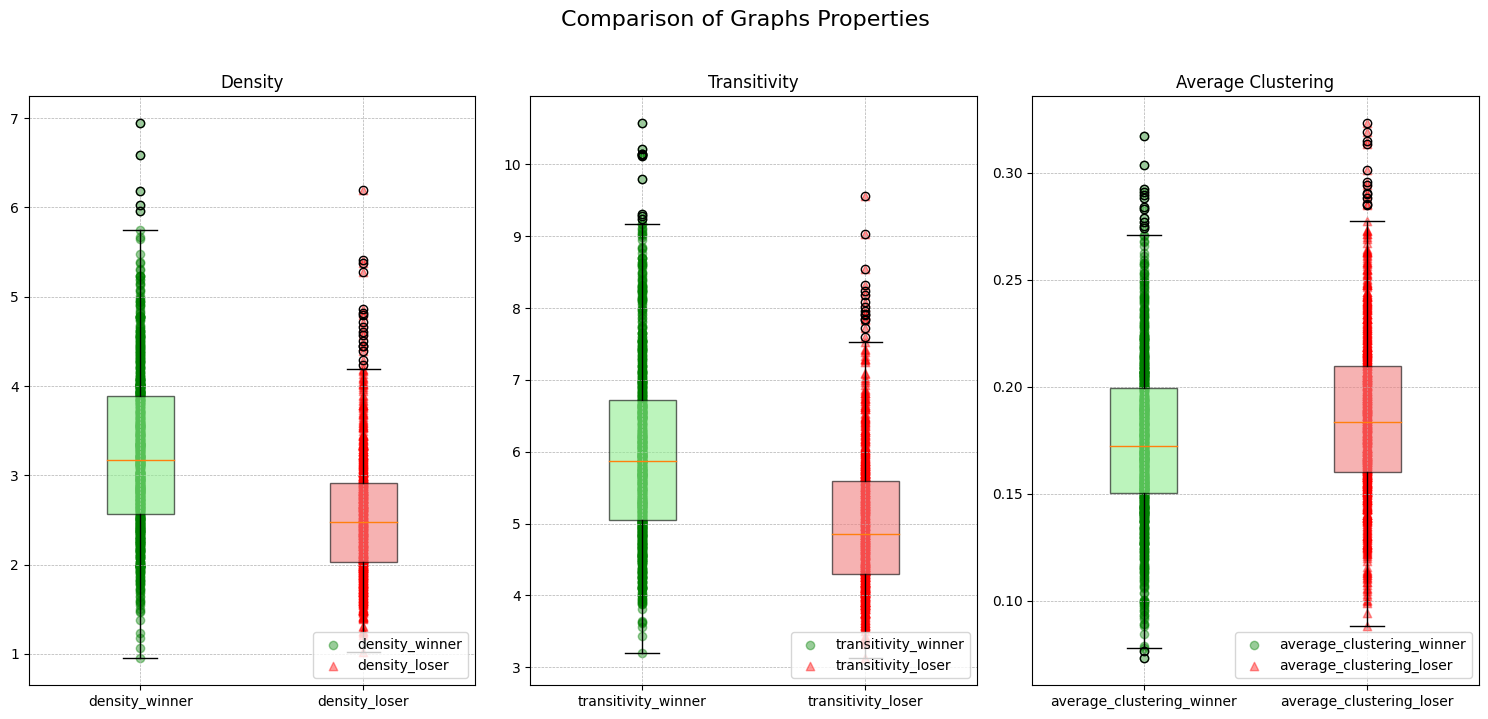

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_density = df_laliga[['density_winner', 'density_loser']]
df_transitivity = df_laliga[['transitivity_winner','transitivity_loser']]
df_diameter = df_laliga[['diameter_winner','diameter_loser']]
df_average_clustering = df_laliga[['average_clustering_winner','average_clustering_loser']]
dfs = [df_density, df_transitivity, df_average_clustering]
titles = ["Density", "Transitivity","Average Clustering"]
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

for j, df in enumerate(dfs):
    vals, names, xs = [], [], []
    for i, col in enumerate(df.columns):
        vals.append(df[col].values)
        names.append(col)
        xs.append([i + 1] * len(df[col].values))

    # Boxplot enhancements
    bp = axs[j].boxplot(vals, labels=names, patch_artist=True, widths=0.3)

    # Changing colors of boxplots
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    palette = ['g', 'r']
    markers = ['o', '^']  # circle for losers, triangle for winners
    for x, val, c, m in zip(xs, vals, palette, markers):
        axs[j].scatter(x, val, alpha=0.4, color=c, marker=m, label=names[palette.index(c)])

        handles, labels = axs[j].get_legend_handles_labels()
        axs[j].legend(handles[:2], labels[:2], loc='lower right')

    axs[j].set_title(titles[j])
    axs[j].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle('Comparison of Graphs Properties', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [95]:
df.columns

Index(['average_clustering_winner', 'average_clustering_loser'], dtype='object')

In [96]:
import pandas as pd

# Assuming `df` is your original DataFrame
graph_properties = ['density', 'transitivity', 'average_clustering', 'diameter']
history_properties = ['winning_history', 'losing_history', 'tie_history']

# Function to assign properties based on the outcome
def assign_properties(row):
    outcome = row['outcome']
    row_data = {'outcome': outcome}
    for prop in graph_properties:
        if outcome == 'home_team_winner':
            row_data[f"{prop}_winner"] = row[f"home_{prop}"]
            row_data[f"{prop}_loser"] = row[f"away_{prop}"]
        elif outcome == 'away_team_winner':
            row_data[f"{prop}_winner"] = row[f"away_{prop}"]
            row_data[f"{prop}_loser"] = row[f"home_{prop}"]

    if outcome == 'home_team_winner':
        row_data["winning_history_winner"] = row['winning_history_home']
        row_data["losing_history_loser"] = row['losing_history_away']
        row_data["losing_history_winner"] = row['losing_history_home']
        row_data["winning_history_loser"] = row['winning_history_away']
        row_data["tie_history_tie"] = (row['tie_history_home'] + row['tie_history_away']) / 2
    elif outcome == 'away_team_winner':
        row_data["winning_history_winner"] = row['winning_history_away']
        row_data["losing_history_loser"] = row['losing_history_home']
        row_data["losing_history_winner"] = row['losing_history_away']
        row_data["winning_history_loser"] = row['winning_history_home']
        row_data["tie_history_tie"] = (row['tie_history_home'] + row['tie_history_away']) / 2
    elif outcome == 'tie':
        row_data["winning_history_winner"] = (row['winning_history_home'] + row['winning_history_away']) / 2
        row_data["losing_history_loser"] = (row['losing_history_home'] + row['losing_history_away']) / 2
        row_data["losing_history_winner"] = (row['losing_history_home'] + row['losing_history_away']) / 2
        row_data["winning_history_loser"] = (row['winning_history_home'] + row['winning_history_away']) / 2
        row_data["tie_history_tie"] = (row['tie_history_home'] + row['tie_history_away']) / 2

    return row_data

# List to hold the row data for the new DataFrame
rows_list = []

# Apply the function to each row in the original DataFrame and append to the rows list
for index, row in df2.iterrows():
    row_data = assign_properties(row)
    rows_list.append(row_data)

# Create a new DataFrame using the rows list
outcomes_df = pd.DataFrame(rows_list)



In [97]:
outcomes_df

,outcome,density_winner,density_loser,transitivity_winner,transitivity_loser,average_clustering_winner,average_clustering_loser,diameter_winner,diameter_loser,winning_history_winner,losing_history_loser,losing_history_winner,winning_history_loser,tie_history_tie
0,away_team_winner,2.848485,3.500000,5.108108,6.361446,0.235510,0.241817,2.0,2.0,0.330000,0.330000,0.330000,0.330000,0.330000
1,away_team_winner,2.923077,1.417582,5.703297,3.366667,0.188117,0.288377,2.0,2.0,1.000000,0.330000,0.000000,0.330000,0.165000
2,home_team_winner,2.472527,1.593407,4.238532,3.582353,0.157029,0.261614,2.0,2.0,1.000000,0.330000,0.000000,0.330000,0.165000
3,home_team_winner,4.102564,1.461538,6.906250,3.992126,0.126724,0.231941,2.0,2.0,1.000000,0.330000,0.000000,0.330000,0.165000
4,away_team_winner,2.164835,1.901099,5.376000,4.270588,0.152249,0.121966,3.0,3.0,1.000000,0.330000,0.000000,0.330000,0.165000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,away_team_winner,1.380952,5.274725,4.104167,8.550000,0.261264,0.127416,3.0,2.0,0.244898,0.095969,0.571429,0.742802,0.172451
864,away_team_winner,5.384615,2.142857,7.545455,4.151515,0.147729,0.218772,2.0,2.0,0.741379,0.468750,0.097701,0.218750,0.236710
865,tie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624783,0.217988,0.217988,0.624783,0.157229
866,tie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450586,0.379021,0.379021,0.450586,0.170393


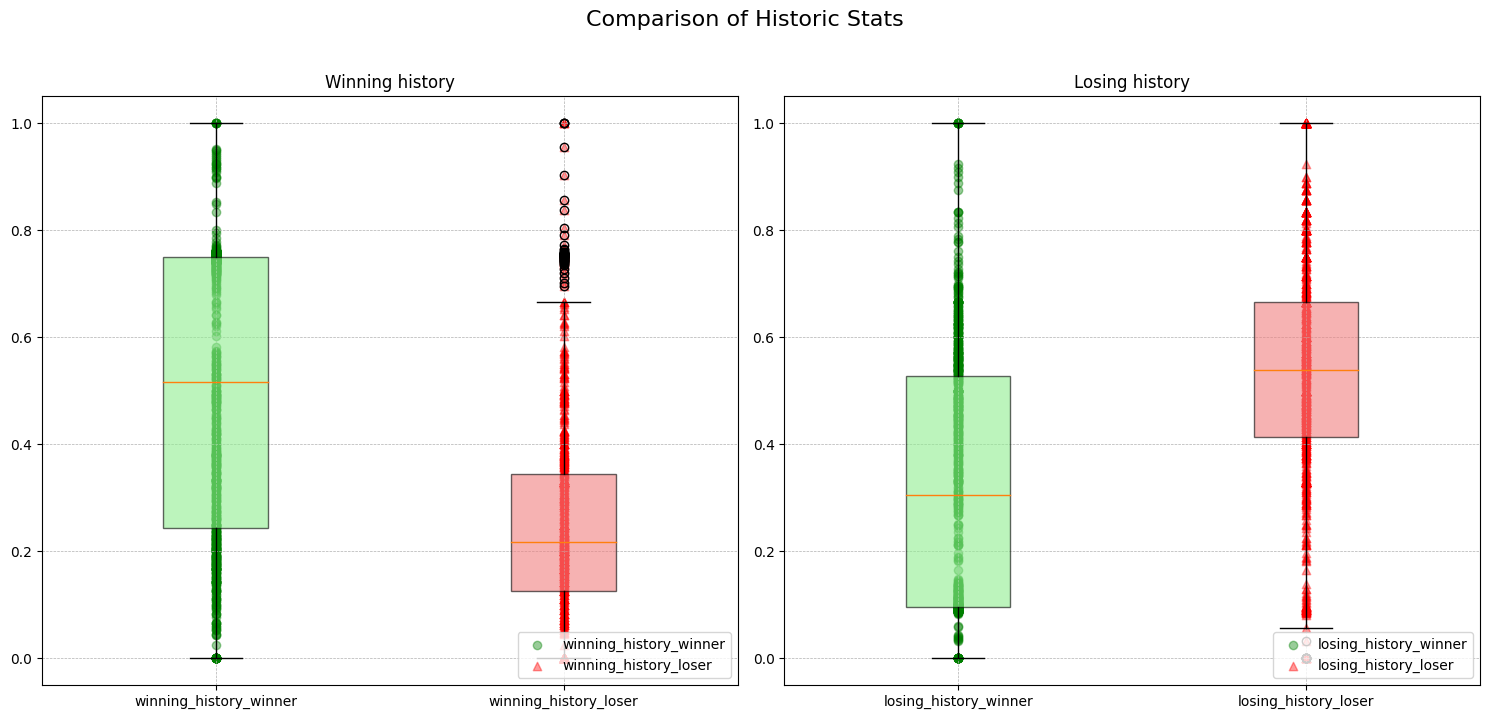

In [98]:


df_win = outcomes_df[['winning_history_winner', 'winning_history_loser']]

df_loss = outcomes_df[['losing_history_winner', 'losing_history_loser']]

dfs = [df_win, df_loss]
titles = ["Winning history", "Losing history"]
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

for j, df in enumerate(dfs):
    vals, names, xs = [], [], []
    for i, col in enumerate(df.columns):
        vals.append(df[col].values)
        names.append(col)
        xs.append([i + 1] * len(df[col].values))

    # Boxplot enhancements
    bp = axs[j].boxplot(vals, labels=names, patch_artist=True, widths=0.3)

    # Changing colors of boxplots
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    palette = ['g', 'r']
    markers = ['o', '^']  # circle for losers, triangle for winners
    for x, val, c, m in zip(xs, vals, palette, markers):
        axs[j].scatter(x, val, alpha=0.4, color=c, marker=m, label=names[palette.index(c)])

        handles, labels = axs[j].get_legend_handles_labels()
        axs[j].legend(handles[:2], labels[:2], loc='lower right')

    axs[j].set_title(titles[j])
    axs[j].grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle('Comparison of Historic Stats', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()